#                                  <h1><center>FINAL PROJECT</center></h1>           

## <center>Einführung in Computer-basiertes physikalisches Modellieren , SS-2018


### <center><b>Ravi Pradip, 3735866</b>




# <h1><center>Potential and Electric field of point charges<center>



## Theory

### Point Charge 

A point charge is a idealized, hypothetical charge located at a single point in space with no area nor volume.
###  Coulomb's law 

'The magnitude of the electrostatic force of attraction or repulsion between two point charges is directly proportional to the product of the magnitudes of charges and inversely proportional to the square of the distance between them.'[1]

Put mathematically if $q$ and $Q$ are two point charges and $r$ is the distance between them, the force $F$ acting between them is given by :

\begin{equation}
{\displaystyle \vec{F}={\frac {1}{4\pi \varepsilon _{0}}}{\frac {qQ.\vec{r}}{{r}^{3}}}}
\end{equation}

where the proportionality constant is often denoted as k and $\varepsilon _{0}$ is the permittivity of free space.The direction of $F$ is along the line joining the charges. And is repulsive if the charges have the same sign and is attractive otherwise.

SI unit of charge is Coulomb (C)

### Electric Field ( $E$ )
The electric field E at a point in space is defined as the force $F$ given by Coulomb's law acting
on a positive test charge $q$ placed at that point divided by the magnitude of the
test charge:

\begin{equation}
{\displaystyle \vec{E} = {\frac {\vec{F}}{q}}\,}
\end{equation}
$E$ is a vector quantity and has the units $NC^{-1}$.
### Electric Potential ( $V$ )

The electric potential at a point r in a static electric field E is given by the line integral

${\displaystyle V =-\int _{C}\vec{E} \cdot \mathrm {d} {\boldsymbol {\vec{\ell }}}\,,}$

For a point charge $Q$ in vaccum, the potential at a distance $r$ from it translates from above as  :

\begin{equation}
{\displaystyle V ={\frac {1}{4\pi \varepsilon _{0}}}{\frac {Q}{\vec{r}}}\,} 
\end{equation}

It is a scalar and has the unit Volt (V).

### Principle of Superposition

Electric field and potential obeys the law of superposition. Calculation of the net effect due to multiple charges can be done by vectorially or algebraically adding up field or potential of individual point charges respectively.



## Objectives

- Visualize electric field and potential distribution for  different configurations of point charges
- Design a simple and straight forward UI for editing or creating custom charge configurations in space



<b>Note : As the distribution of electric field and potential are more interesting than their actual values when it comes to visualizing them in space; All the calculations below ignore the constant of propotionality $k$ introduced in the theory section. </b>

## UI Design


UI to configure magnitude, position and number of charges.

In [1]:
%matplotlib inline

import numpy as np #Calculations
import matplotlib
from matplotlib import pyplot as plt #Graphics 
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display # Interactive UI
import ipywidgets as widgets
from ipywidgets import Layout

In [2]:
#Global Block
Q=[]

<b>Function to generate adequate no. of sliders. Note: Z cood. only becomes active if 3d is checked</b>

In [3]:
def gen_slider(qnov) :
    global v_container 
    v_container= widgets.Box()
    for counter in range(qnov) :
        Qmark= widgets.HTML(value="<b>Q{}</b>".format(counter+1)) #Charge Labels
        mag= widgets.IntText(value=1,description="Charge",layout=Layout(width='150px', height='30px')) #Magnitude
        sliderX=widgets.IntSlider(value=0,min=-5,max=5,step=1,description="X") #Sliders
        sliderY=widgets.IntSlider(value=0,min=-5,max=5,step=1,description="Y") 
        sliderZ=widgets.IntSlider(value=0,min=-5,max=5,step=1,description="Z (3D)")
        h_container = widgets.Box() # Grids for Aligning all of the above
        display(h_container)
        h_container.children += (Qmark,mag,sliderX, sliderY,sliderZ)
        v_container.children += (h_container,)
    button=widgets.Button(description="Update") #Update Button
    h_cont=widgets.Box()
    h_cont.children += (button,check)
    display(h_cont)
    button.on_click(gen_Q)   # Update Trigger
    

<b>Function to read the values of sliders</b>

In [4]:
def gen_Q(b): # Prepare the list of lists Q, with charge and position info
    global Q
    Q=[]
    for c in v_container.children:
        q=[]
        for i in range(1,5):
            q.append(c.children[i].value)
        Q.append(q)
    if check.value:
        config_plot3d(Q)
    else:
        config_plot(Q)
    

<b>Functions for plotting</b> 
as mentioned above the constant $k$ is ignored for the reasons of colormap scaling.

In [5]:
def config_plot(Q): # Plotting 
    
    N=100
    x_m, y_m = np.linspace(-5,5,N), np.linspace(-5,5,N)
    x_g,y_g = np.meshgrid(x_m,y_m)
    Ex = np.zeros_like(x_g)         
    Ey = np.zeros_like(y_g)         
    V=np.zeros_like(x_g)
    i=1
    fig=plt.figure(figsize=(21,7))
    ax1=fig.add_subplot(121)
    charge = {True: 'red', False: 'black'} #Reds are positive, Black negative
    for q in Q:  # mark charge locations
        plt.plot(q[1], q[2], marker='o', markersize=8, color=charge[q[0]>0])
        plt.text(q[1], q[2],"Q{}({} C)".format(i,q[0]),fontsize=12)
        i+=1

    for i in range(N):      # calculate Ex and Ey at each point in the grid
        for j in range(N):
            x, y = x_g[i,j], y_g[i,j]
            for k in range(len(Q)): 

                Ex[i,j] += Q[k][0]*(x-Q[k][1])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
                Ey[i,j] += Q[k][0]*(y-Q[k][2])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
                V[i,j] += Q[k][0]/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(0.5)


    color = 2 * np.log(np.hypot(Ex, Ey)) # Normalizing to log. color map for better rep.
    stream = plt.streamplot(x_g, y_g, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.jet,
                  density=1.5, arrowsize=1.5,arrowstyle='->')
    # Labels
    plt.title("Electric Field Lines")
    cbar = plt.colorbar(stream.lines)
    cbar.ax.set_ylabel("$log(Field-Strength)$")
    ax1.set_xlabel('$x $')
    ax1.set_ylabel('$y $')
    
    ax2 = fig.add_subplot(1,2,2,projection='3d')
    plt.title("Electric Potential")
    ax2.set_xlabel('$x $')
    ax2.set_ylabel('$y $')
    ax2.set_zlabel('$Potential $')
    surface=ax2.plot_surface(x_g,y_g,V,cmap=plt.cm.jet,norm=colors.SymLogNorm(linthresh=0.03,
                                                                              vmin=np.min(V),vmax=np.max(V)))
    cbar2=plt.colorbar(surface,ticks=[0])
    plt.show()


In [6]:
def config_plot3d(Q):#Same procedure in 3d
    N=5
    x_m, y_m, z_m = np.linspace(-5,5,N), np.linspace(-5,5,N), np.linspace(-5,5,N)
    x_g,y_g,z_g = np.meshgrid(x_m,y_m,z_m)
    Ex = np.zeros_like(x_g)         # 2D array to store the Ex and
    Ey = np.zeros_like(y_g)
    Ez = np.zeros_like(z_g)
    V = np.zeros_like(z_g)
    

    fig = plt.figure(figsize=(10,8))
    ax = plt.gca(projection='3d')
    i=1
    for q in Q:  # mark charge locations
        ax.scatter3D(q[1], q[2], q[3])
        ax.text(q[1], q[2], q[3],"Q{}".format(i))
        i+=1

    for i in range(N):      # calculate Ex and Ey at each point in the grid, due to all charges
        for j in range(N):
            for k in range(N):
                x, y,z = x_g[i,j,k], y_g[i,j,k], z_g[i,j,k]
                for l in range(len(Q)):
                 # sum over the charges, using equation from the text book
                    den=((x-Q[l][1])**2+(y-Q[l][2])**2+(z-Q[l][3])**2)**(1.5)
                    Ex[i,j,k] += Q[l][0]*(x-Q[l][1])/ den
                    Ey[i,j,k] += Q[l][0]*(y-Q[l][2])/ den
                    Ez[i,j,k] += Q[l][0]*(z-Q[l][3])/ den

    ax.quiver(x_g, y_g, z_g, Ex, Ey, Ez,length=0.6,normalize=True,linewidth=2.1,cmap=plt.cm.autumn)
    plt.title("Electric Field")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()


# DASHBOARD :


In [7]:
#Drop Down
style = {'description_width': 'initial'}


qno=widgets.Dropdown(options=list(range(1,9)),value=2,description='No.of charges :',
            layout=Layout(width='150px', height='30px'),
            style=style) #Max charge no. set to 8 just to keep things tidy
check=widgets.Checkbox(value=False,
    description='Enable 3D Positioning',
    disabled=False)
a=widgets.HTML(value="<b>DASHBOARD</b>")
display(a)
widgets.interactive(gen_slider, qnov=qno)



HTML(value='<b>DASHBOARD</b>')

interactive(children=(Dropdown(description='No.of charges :', index=1, layout=Layout(height='30px', width='150…

## Sample configurations

- Charges with alternating poles placed on the corner of a square

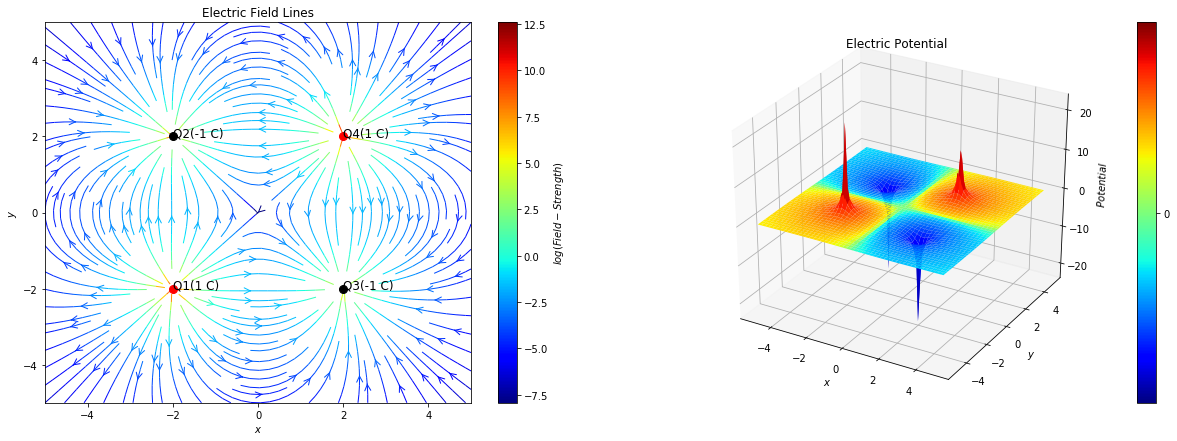

In [8]:
Q= [[1, -2, -2, 0], [-1, -2, 2, 0], [-1, 2, -2, 0], [1, 2, 2, 0]]
config_plot(Q)


- Charges with alternating poles spaced equidistantly on a circle

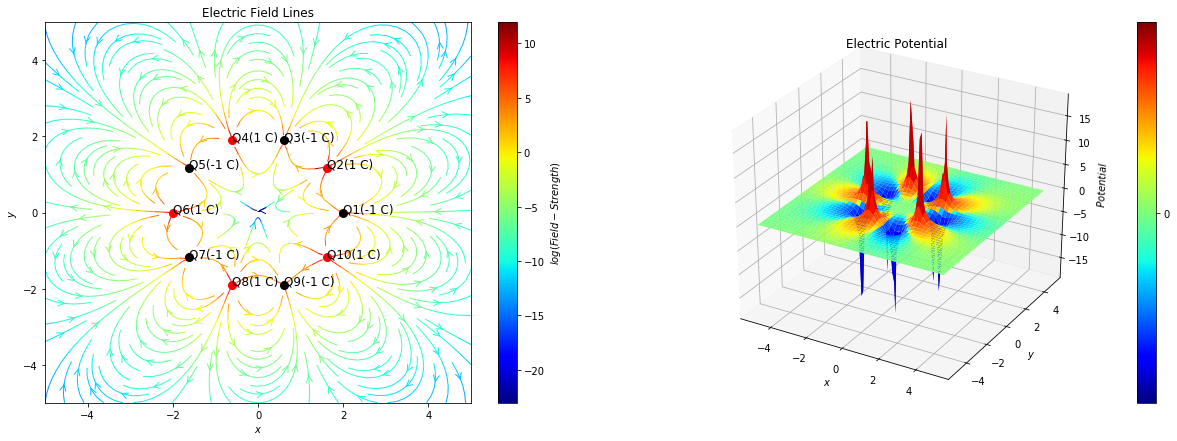

In [9]:
config = []
n=10 # Total no.
for i in range(n):
    q = i%2 * 2 - 1
    config.append([q, 2*np.cos(2*np.pi*i/n), 2*np.sin(2*np.pi*i/n)])

config_plot(config)


## Conclusion

A program to visualise the field and potential of any 2-dimensional charge configuration has been successfully created and tested. The electric field line plots rely on the colormap to show the relative field strength at various points in space. The potential plot is implemented with a surface plot equipped with a colormap indicating relative potential in all points. As both the quantities fall at a rapid rate from the position of the point charge, colormaps had to be normalized with a Logarithmic scheme.

Experimentally, positioning for 3D configurations is also implemented. However in this case only the electric field is plotted.

## Bibliography

- [1] Wikipedia : Electrostatics
- Real Python . https://realpython.com/python-matplotlib-guide
- Tipler, Mosca.Physics for Scienctists and Engineers. Vol 2 
- ipywidgets - https://ipywidgets.readthedocs.io/